#### IMPORTING NECCESSARY LIBRARIES

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv(r"C:\Users\alito\OneDrive\DATASETCOLL\advertising.csv")
sales.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0


##### DATA INSPECTION

In [3]:
sales.shape

(200, 4)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


##### DATA CLEANING

In [6]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
#No null values are present in the dataset.

##### OUTLIER ANALYSIS

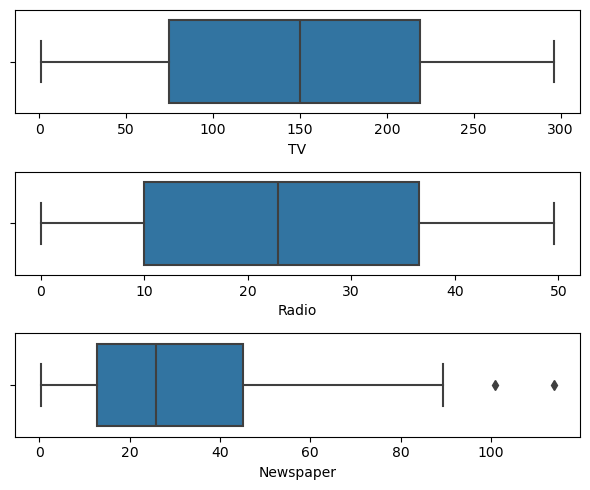

In [8]:
fig,axs = plt.subplots(3,figsize=(6,5))
sns.boxplot(x="TV",data = sales,ax=axs[0])
sns.boxplot(x="Radio",data = sales,ax=axs[1])
sns.boxplot(x="Newspaper",data = sales,ax=axs[2])
plt.tight_layout()

In [9]:
#Considerably there are no such outliers that needs to be removed.

##### EXPLORATORY DATA ANALYSIS

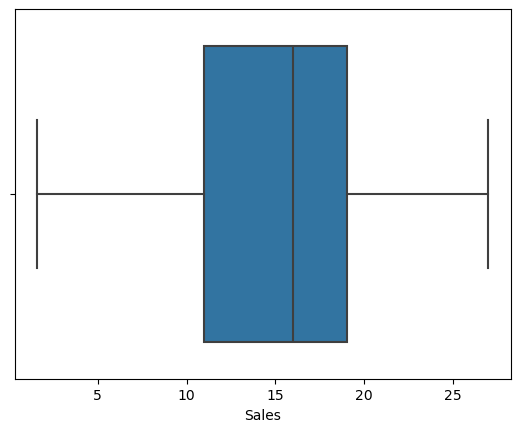

In [10]:
sns.boxplot(x = "Sales",data = sales)
plt.show()

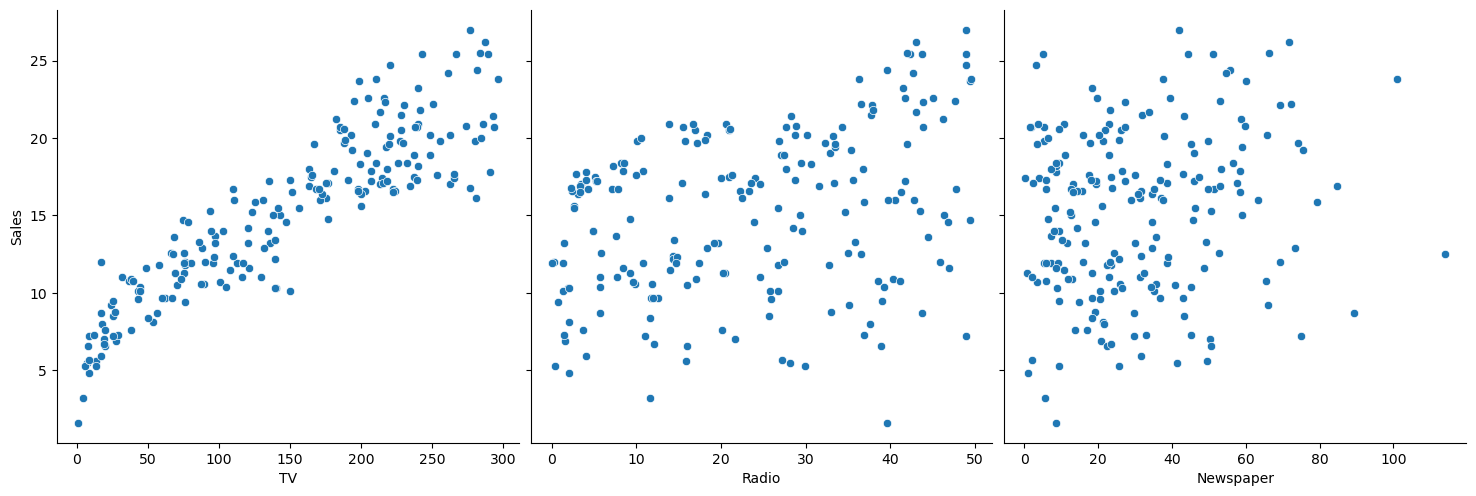

In [11]:
sns.pairplot(sales,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",kind="scatter",height=5,aspect=1)
plt.show()

In [12]:
#checking the correlation with heatmap and manually too.

In [13]:
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


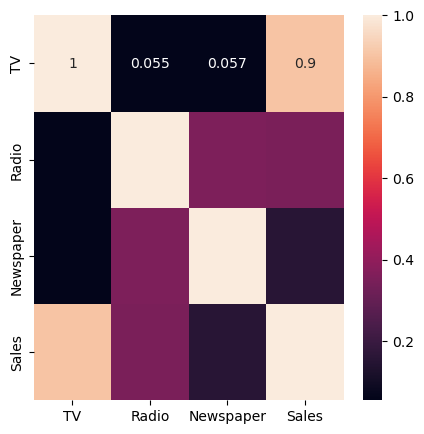

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(data = sales.corr(),annot = True)
plt.show()

##### MODEL BUILDING

In [15]:
x = sales[["TV"]]
y = sales["Sales"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=39)

In [18]:
x_train.shape,y_train.shape

((160, 1), (160,))

In [19]:
x_train.head()

,TV
17,281.4
166,17.9
34,95.7
184,253.8
86,76.3


In [20]:
y_train.head()

17     24.4
166     8.0
34     11.9
184    17.6
86     12.0
Name: Sales, dtype: float64

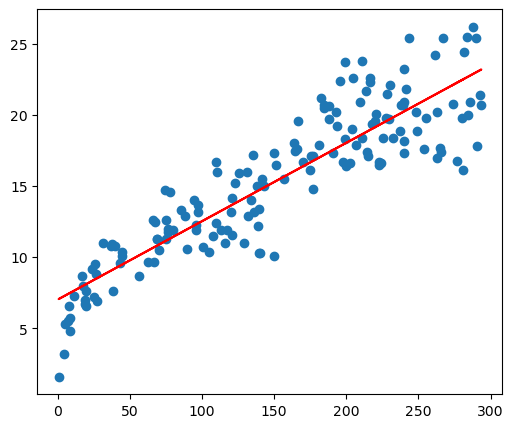

In [21]:
plt.figure(figsize=(6,5))
plt.scatter(x_train,y_train)
plt.plot(x_train, 0.05510041*x_train+7.022062027369575,color = "red")
plt.show()

##### BUILDING A LINEAR MODEL

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
lr.coef_

array([0.05510041])

In [25]:
lr.intercept_

7.022062027369575

##### CALCULATING THE ERRORS

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

In [27]:
print("MSE:",mean_squared_error(y_test,lr.predict(x_test)))
print("MAE:",mean_absolute_error(y_test,lr.predict(x_test)))
print("RMSE:",np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

MSE: 4.161944460483149
MAE: 1.6202496121338115
RMSE: 2.0400844248420573


In [29]:
ytr_prd =lr.predict(x_train)

In [30]:
# residual analysis
res = y_train - ytr_prd
# res

C:\Users\alito\AppData\Local\Temp\ipykernel_17028\170080939.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


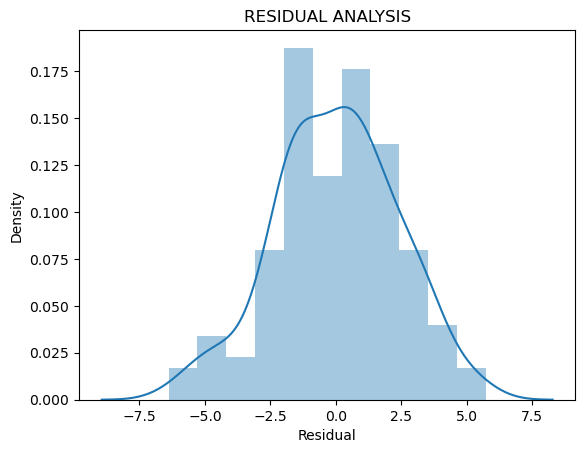

In [31]:
plt.title("RESIDUAL ANALYSIS")
sns.distplot(res)
plt.xlabel("Residual")
plt.show()

In [32]:
# The residual are normally distributed. Therefore, no issues here.

##### MODEL EVALUATION

In [33]:
lr.score(x_test,y_test)

0.852023665668107

In [34]:
lr.predict([[230.1]])

C:\Users\alito\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.70066736])

##### PREDICTION ON THE DATA

In [35]:
y_pred = lr.predict(x)

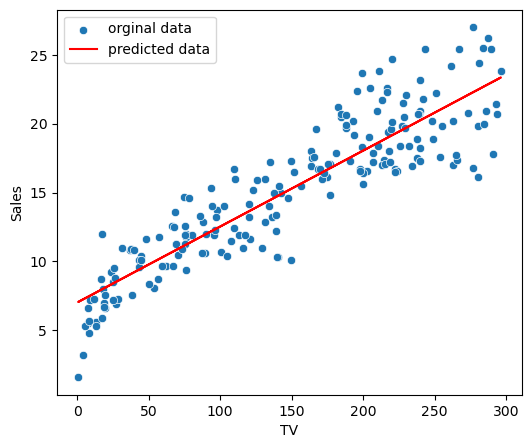

In [36]:
plt.figure(figsize=(6,5))
sns.scatterplot(x ="TV",y ="Sales",data = sales)
plt.plot(sales["TV"],y_pred,c="red")
plt.legend(["orginal data","predicted data"])
plt.show()

In [37]:
y_prd = lr.predict(x_test)

In [45]:
# Visualizing the fit on the test set

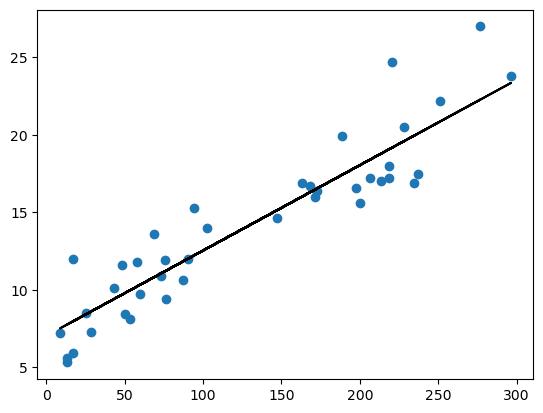

In [46]:
plt.scatter(x_test,y_test)
plt.plot(x_test,lr.predict(x_test),color = "black")
plt.show()

In [43]:
y_test.shape,y_prd.shape

((40,), (40,))

In [41]:
y_test = y_test.values.reshape(40,)

In [44]:
new_data = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_prd.flatten()})
new_data.head()

,actual,predicted
0,24.7,19.160683
1,18.0,19.055993
2,9.4,11.231734
3,10.6,11.826818
4,16.7,16.300972
